# Custo Hospitalar

 Links:

 - https://www.kaggle.com/mirichoi0218/insurance

# Bibliotecas

In [1]:
import pandas as pd
import warnings
import numpy as np
import itertools
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Binarizer, MaxAbsScaler, Normalizer, PowerTransformer, QuantileTransformer
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import cross_validate, StratifiedKFold, cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from sklearn import linear_model
from sklearn.metrics import accuracy_score, mean_squared_error, max_error, mean_absolute_error
from sklearn.metrics import roc_curve, r2_score
from shapely.geometry.polygon import Polygon
from scipy.spatial import ConvexHull
from decimal import Decimal

# Extração dos Dados

In [2]:
warnings.filterwarnings("ignore")

dados = pd.read_csv("insurance.csv")
dados.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Dummies

In [3]:
dados.sex.unique()

array(['female', 'male'], dtype=object)

In [4]:
dados.smoker.unique()

array(['yes', 'no'], dtype=object)

In [5]:
dados.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [6]:
numerico_sex = {"female": 0, "male": 1}
numerico_smok = {"no": 0, "yes": 1}
numerico_reg = {"southwest": 0, "southeast": 1, "northwest": 2, "northeast": 3}

dados.sex.replace(numerico_sex, inplace = True)
dados.smoker.replace(numerico_smok, inplace = True)
dados.region.replace(numerico_reg, inplace = True)

dados.region = dados.region.astype(object)
dados = pd.get_dummies(dados)
dados

,age,sex,bmi,children,smoker,charges,region_0,region_1,region_2,region_3
0,19,0,27.900,0,1,16884.92400,1,0,0,0
1,18,1,33.770,1,0,1725.55230,0,1,0,0
2,28,1,33.000,3,0,4449.46200,0,1,0,0
3,33,1,22.705,0,0,21984.47061,0,0,1,0
4,32,1,28.880,0,0,3866.85520,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,0,1,0
1334,18,0,31.920,0,0,2205.98080,0,0,0,1
1335,18,0,36.850,0,0,1629.83350,0,1,0,0
1336,21,0,25.800,0,0,2007.94500,1,0,0,0


# Novas Variáveis

In [7]:
dados["age_smoker"] = dados.age * dados.smoker
dados["bmi_smoker"] = dados.bmi * dados.smoker
dados["children_smoker"] = dados.children * dados.smoker

dados

,age,sex,bmi,children,smoker,charges,region_0,region_1,region_2,region_3,age_smoker,bmi_smoker,children_smoker
0,19,0,27.900,0,1,16884.92400,1,0,0,0,19,27.90,0
1,18,1,33.770,1,0,1725.55230,0,1,0,0,0,0.00,0
2,28,1,33.000,3,0,4449.46200,0,1,0,0,0,0.00,0
3,33,1,22.705,0,0,21984.47061,0,0,1,0,0,0.00,0
4,32,1,28.880,0,0,3866.85520,0,0,1,0,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,0,1,0,0,0.00,0
1334,18,0,31.920,0,0,2205.98080,0,0,0,1,0,0.00,0
1335,18,0,36.850,0,0,1629.83350,0,1,0,0,0,0.00,0
1336,21,0,25.800,0,0,2007.94500,1,0,0,0,0,0.00,0


In [8]:
dados.describe()

,age,sex,bmi,children,smoker,charges,region_0,region_1,region_2,region_3,age_smoker,bmi_smoker,children_smoker
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242900,0.272048,0.242900,0.242152,7.887145,6.288576,0.227952
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428995,0.445181,0.428995,0.428546,16.772800,12.721374,0.689419
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,64.000000,52.580000,5.000000


# Pré-Processamento dos Dados

In [9]:
Nomes = list(dados.columns).copy()
Nomes.remove("charges")

X = dados.copy()
X = X[Nomes]
Y = dados.copy()
Y = Y.charges

X_A, X_val_A, Y, Y_val_A = train_test_split(X, Y, test_size = 0.1, random_state = 7)

escala_minmax = MinMaxScaler().fit(X_A)
X_B = escala_minmax.transform(X_A)

escala_padronizada = StandardScaler().fit(X_A)
X_C = escala_padronizada.transform(X_A)

escala_robust = RobustScaler().fit(X_A)
X_D = escala_robust.transform(X_A)

escala_maxabs = MaxAbsScaler().fit(X_A)
X_E = escala_maxabs.transform(X_A)

escala_normalizer = Normalizer().fit(X_A)
X_F = escala_normalizer.transform(X_A)

escala_quantile = QuantileTransformer(random_state = 7).fit(X_A)
X_G = escala_quantile.transform(X_A)

Y = Y.values

# Cross-Validation

In [10]:
def cross_val(score_k, cv):
    escala = {"Original": [None, X_A.values],
              "MinMaxScaler": [preprocessing.MinMaxScaler(), X_B],
              "StandardScaler": [preprocessing.StandardScaler(), X_C],
              "RobustScaler": [preprocessing.RobustScaler(), X_D],
              "MaxAbsScaler": [preprocessing.MaxAbsScaler(), X_E],
              "Normalizer": [preprocessing.Normalizer(), X_F],
              "QuantileTransformer": [preprocessing.QuantileTransformer(random_state = 7), X_G]}
    
    metricas = {"RMSE": "neg_root_mean_squared_error",
                "r2": "r2"}
    
    modelos = {"SGDRegressor": SGDRegressor(random_state = 7),
               "MLPRegressor": MLPRegressor(random_state = 7),
               "KNeighborsRegressor": KNeighborsRegressor(),
               "LinearRegression": LinearRegression(),
               "AdaBoostRegressor": AdaBoostRegressor(random_state = 7)}
    
    c = 0
    resultados = []
    for modelo in modelos:
        for esc in escala:
            for K in [12, 11, 10, 9, 8, 7, 6, 5, 4, 3]:

                kbest = SelectKBest(score_k, k = K).fit(escala[esc][1], Y)
                colunas = kbest.get_support(indices = True)
                cross = cross_validate(make_pipeline(escala[esc][0], modelos[modelo]), X_A.values[:,colunas], Y, cv = cv, scoring = metricas)

                resultados.append((modelo, esc, K, (sum(cross["test_RMSE"]) / 5), (sum(cross["test_r2"]) / 5)))
                if c % 11 == 0:
                    print(resultados[c])
                c += 1
            
    return pd.DataFrame(resultados, columns = ["Modelos", "Escala dos Dados", "Variáveis Utilizadas",
                                               "RMSE Médio", "R2 Médio"]).sort_values("RMSE Médio", ascending = False)

#results = cross_val(mutual_info_regression, 5)
#results.to_csv(r"custo_cross.csv", index = False)
results = pd.read_csv("custo_cross.csv")
results.head(56)

,Modelos,Escala dos Dados,Variáveis Utilizadas,RMSE Médio,R2 Médio
0,LinearRegression,QuantileTransformer,10,-4683.242153,0.849032
1,LinearRegression,QuantileTransformer,12,-4687.331257,0.848775
2,LinearRegression,QuantileTransformer,11,-4687.331257,0.848775
3,LinearRegression,QuantileTransformer,7,-4689.407772,0.848605
4,LinearRegression,QuantileTransformer,8,-4693.763518,0.848329
5,LinearRegression,QuantileTransformer,9,-4700.184909,0.847912
6,LinearRegression,QuantileTransformer,6,-4708.269002,0.847351
7,LinearRegression,QuantileTransformer,4,-4708.769293,0.847310
8,LinearRegression,QuantileTransformer,5,-4713.312184,0.847017
9,LinearRegression,StandardScaler,10,-4814.567995,0.840448


In [11]:
def cross_variaveis(r = results):
    R = r[r["RMSE Médio"] == r["RMSE Médio"].max()].values[0]
    
    escala = {"Original": [None, X_A],
              "MinMaxScaler": [preprocessing.MinMaxScaler(feature_range = (0, 1)), X_B],
              "StandardScaler": [preprocessing.StandardScaler(), X_C],
              "RobustScaler": [preprocessing.RobustScaler(), X_D],
              "MaxAbsScaler": [preprocessing.MaxAbsScaler(), X_E],
              "Normalizer": [preprocessing.Normalizer(), X_F],
              "QuantileTransformer": [preprocessing.QuantileTransformer(), X_G]}
    
    kb = SelectKBest(mutual_info_regression, k = R[2]).fit(escala[R[1]][1], Y)
    colunas = kb.get_support(indices = True)
    kb = pd.DataFrame(escala[R[1]][1]).iloc[:,colunas]
    
    print("Quantidade de Variáveis Mais Importantes: ", R[2])
    print("Escala dos Dados: ", R[1])
    print("Variáveis Utilizadas:")
    for i in colunas:
        print(Nomes[i])
        
    return kb, colunas

X, colunas = cross_variaveis(results)
X.dtypes
X.head(7)

Quantidade de Variáveis Mais Importantes:  10
Escala dos Dados:  QuantileTransformer
Variáveis Utilizadas:
age
sex
bmi
children
smoker
region_2
region_3
age_smoker
bmi_smoker
children_smoker


,0,1,2,3,4,7,8,9,10,11
0,0.640641,1.0,0.504505,0.91041,1.0,1.0,0.0,0.936937,0.897898,0.983483
1,0.445445,1.0,0.960476,0.91041,1.0,0.0,1.0,0.893393,0.990007,0.983483
2,0.703203,1.0,0.835836,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0.406406,1.0,0.971972,0.54955,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,0.464965,0.0,0.525526,0.76026,0.0,0.0,0.0,0.000000,0.000000,0.000000
5,0.808809,1.0,0.044056,0.76026,0.0,0.0,0.0,0.000000,0.000000,0.000000
6,0.904404,0.0,0.559059,0.00000,0.0,1.0,0.0,0.000000,0.000000,0.000000


In [12]:
def previsao(r, g1, g2, c):
    R = r[r["RMSE Médio"] == r["RMSE Médio"].max()].values[0]
    
    if R[1] == "MinMaxScaler":
        X_ = escala_minmax.transform(g1)
    
    elif R[1] == "Original":
        X_ = g1
    
    elif R[1] == "StandardScaler":
        X_ = escala_padronizada.transform(g1)
    
    elif R[1] == "RobustScaler":
        X_ = escala_robust.transform(g1)
    
    elif R[1] == "Normalizer":
        X_ = escala_normalizer.transform(g1)
    
    elif R[1] == "MaxAbsScaler":
        X_ = escala_maxabs.transform(g1)
    
    else:
        X_ = escala_quantile.transform(g1)
    
    return pd.DataFrame(X_).iloc[:,c], g2

X_val, Y_val = previsao(results, X_val_A, Y_val_A, colunas)
val = X_val.head(7)
X_val = X_val.values
val

,0,1,2,3,4,7,8,9,10,11
0,0.847848,0.0,0.926927,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.703203,1.0,0.459459,0.54955,0.0,0.0,1.0,0.000000,0.000000,0.0
2,0.000000,1.0,0.000000,0.00000,0.0,0.0,1.0,0.000000,0.000000,0.0
3,0.502002,0.0,0.011849,1.00000,1.0,0.0,0.0,0.905906,0.798205,1.0
4,0.788789,1.0,0.153654,0.00000,0.0,1.0,0.0,0.000000,0.000000,0.0
5,0.137638,1.0,0.418418,0.00000,0.0,1.0,0.0,0.000000,0.000000,0.0
6,0.483984,1.0,0.019418,0.00000,1.0,0.0,0.0,0.903574,0.799121,0.0


# Otimização

 Como o melhor modelo foi a regressão linear, não podemos otimizar seus hiperparâmetros já que tal modelo é muito simples e não contem parametros numéricos para otimizar.

# Previsões

## Dados de Validação

________________________________________________________________MODELO OTIMIZADO APLICADO NOS DADOS DE VALIDAÇÃO:
________________________________________________________________RMSE:  5139.966105952714
________________________________________________________________PEARSON:  0.9113297372861495
________________________________________________________________DISTRIBUIÇÃO POLIGONAL:  9.11E+08
________________________________________________________________R2:  0.8295554117372845
________________________________________________________________ERRO RESIDUAL MÁXIMO:  21565.623357689325
________________________________________________________________MAE:  3005.778070234559


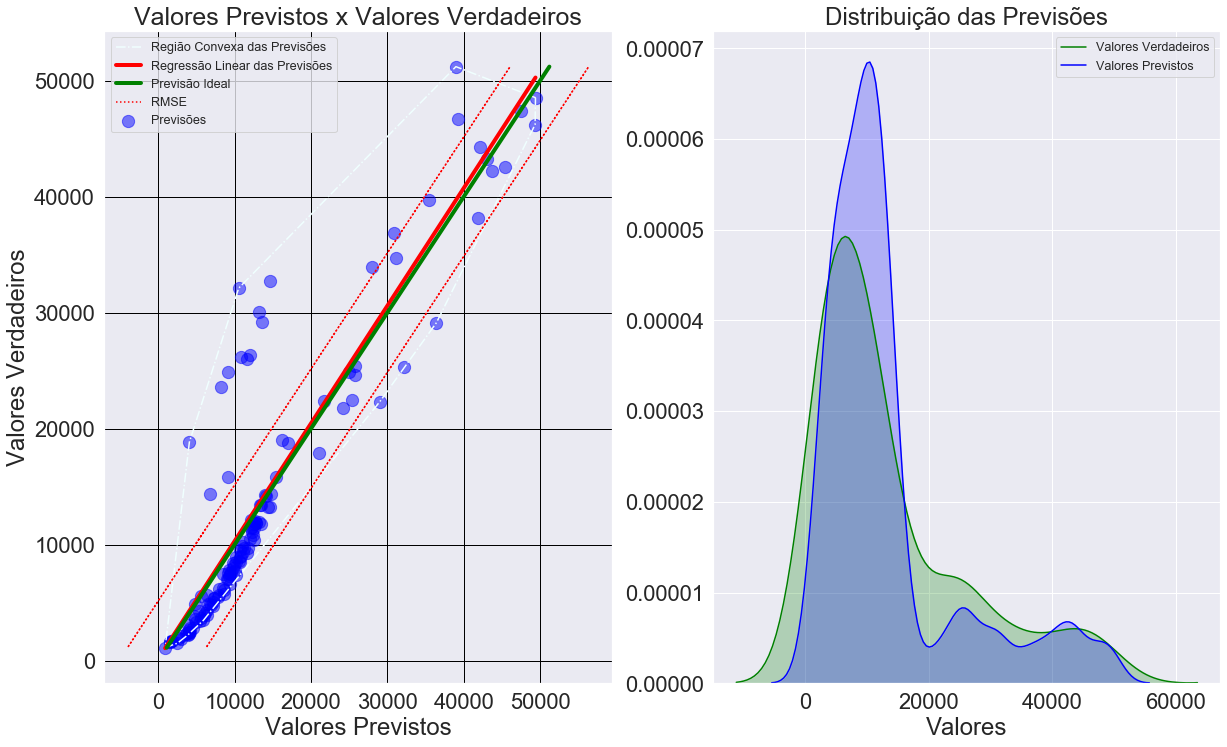

In [13]:
def convexhull(p):
    p = np.array(p)
    hull = ConvexHull(p)
    return p[hull.vertices,:]

def modelos(modelo, Xtreino, Ytreino, Xteste, Yteste):
    sns.set(font_scale = 2)
    modelo.fit(Xtreino, Ytreino)
    
    valores_previstos = modelo.predict(Xteste)
        
    modelo1 = LinearRegression()
    modelo1 = modelo1.fit(pd.DataFrame(valores_previstos), Yteste)
    reta = modelo1.intercept_ + modelo1.coef_ * valores_previstos
    reta1 = Yteste
    
    min_reta = modelo1.intercept_ + modelo1.coef_ * min(valores_previstos)
    max_reta = modelo1.intercept_ + modelo1.coef_ * max(valores_previstos)
    
    RMSE = mean_squared_error(Yteste, valores_previstos, squared = False)
    r2 = r2_score(Yteste, valores_previstos)
    resid = max_error(Yteste, valores_previstos)
    mae = mean_absolute_error(Yteste, valores_previstos)
    
    produto_cartesiano = []
    for i in range(len(Yteste)):
        produto_cartesiano.append((valores_previstos[i], Yteste.reset_index(drop = True)[i]))  
    
    poly = Polygon(convexhull(produto_cartesiano))
    x,y = poly.exterior.xy
    
    print("________________________________________________________________RMSE: ", RMSE)
    print("________________________________________________________________PEARSON: ", pearsonr(reta1, reta)[0])
    print("________________________________________________________________DISTRIBUIÇÃO POLIGONAL: ", '%.2E' % Decimal(str(poly.area)))
    print("________________________________________________________________R2: ", r2)
    print("________________________________________________________________ERRO RESIDUAL MÁXIMO: ", resid)
    print("________________________________________________________________MAE: ", mae)
    
    fig, ax = plt.subplots(1, 2, figsize = (20,12))
    ax[0].plot(x, y, linestyle = "-.", color = "azure", label = "Região Convexa das Previsões")
    sns.lineplot(valores_previstos, reta, color = "red", ax = ax[0], label = "Regressão Linear das Previsões", linewidth = 4)
    sns.lineplot(reta1, reta1, color = "green", ax = ax[0], label = "Previsão Ideal", linewidth = 4)
    ax[0].plot(reta1 + RMSE, reta1, color = "red", linestyle = ":", label = "RMSE")
    ax[0].plot(reta1 - RMSE, reta1, color = "red", linestyle = ":")
    ax[0].grid(color = 'black', linestyle = '-', linewidth = 1.0)
    ax[0].scatter(x = valores_previstos, y = Yteste,  color = "blue", s = 150, alpha = 0.5, label = "Previsões")
    ax[0].set_title("Valores Previstos x Valores Verdadeiros", fontsize = 25)
    ax[0].set_xlabel("Valores Previstos")
    ax[0].set_ylabel("Valores Verdadeiros")
    ax[0].legend(fontsize = 12.5)
    
    ax[1].set_title("Distribuição das Previsões")
    ax[1].set_xlabel("Valores")
    sns.kdeplot(Yteste, color = "green", ax = ax[1], shade = True, label = "Valores Verdadeiros")
    sns.kdeplot(valores_previstos, color = "blue", ax = ax[1], shade = True, label = "Valores Previstos")
    ax[1].legend(fontsize = 12.5)
    
    plt.show()

print("________________________________________________________________MODELO OTIMIZADO APLICADO NOS DADOS DE VALIDAÇÃO:")
modelos(LinearRegression(), X, Y, X_val, Y_val)

## Dados de Treino

________________________________________________________________RMSE:  4635.807128002232
________________________________________________________________PEARSON:  0.9232404168743196
________________________________________________________________DISTRIBUIÇÃO POLIGONAL:  1.55E+09
________________________________________________________________R2:  0.8523728673502674
________________________________________________________________ERRO RESIDUAL MÁXIMO:  29567.436837254216
________________________________________________________________MAE:  2719.6763675513116


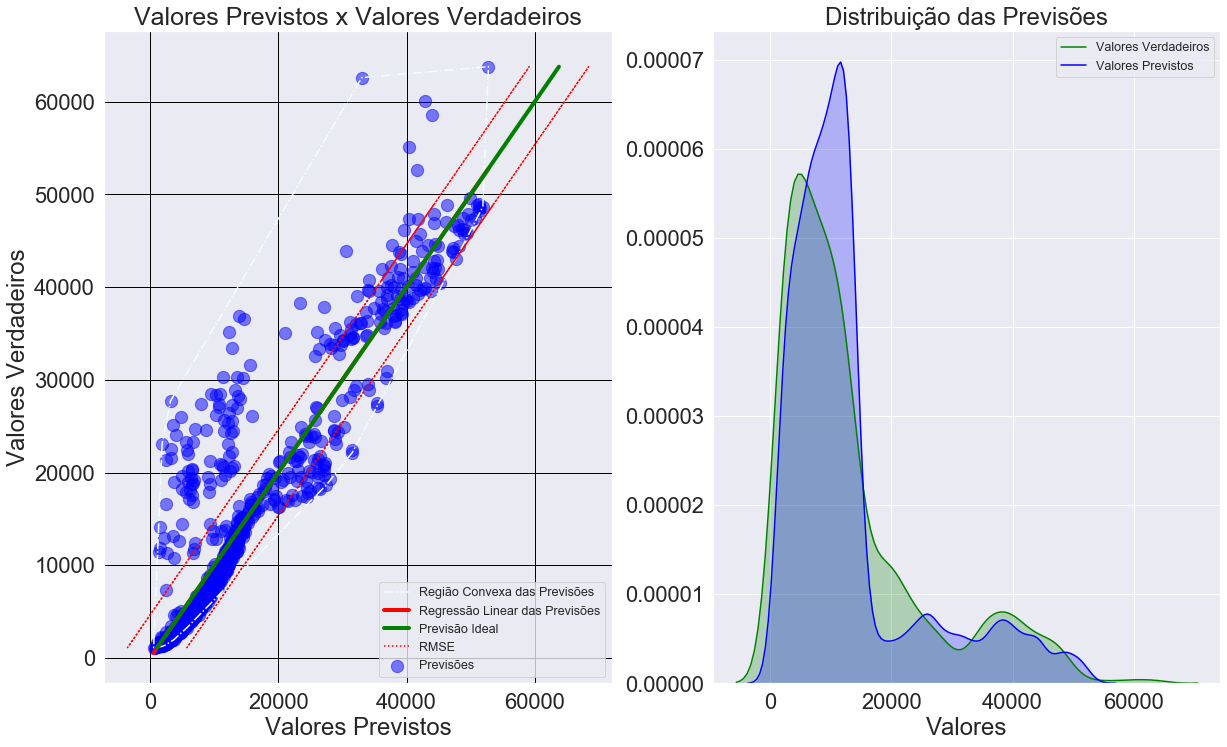

In [14]:
modelos(LinearRegression(), X, Y, X, pd.Series(Y))

## Todos os Dados

________________________________________________________________RMSE:  4688.741709177675
________________________________________________________________PEARSON:  0.9219493996336976
________________________________________________________________DISTRIBUIÇÃO POLIGONAL:  1.55E+09
________________________________________________________________R2:  0.8499803208208825
________________________________________________________________ERRO RESIDUAL MÁXIMO:  29567.436837254216
________________________________________________________________MAE:  2748.329303395523


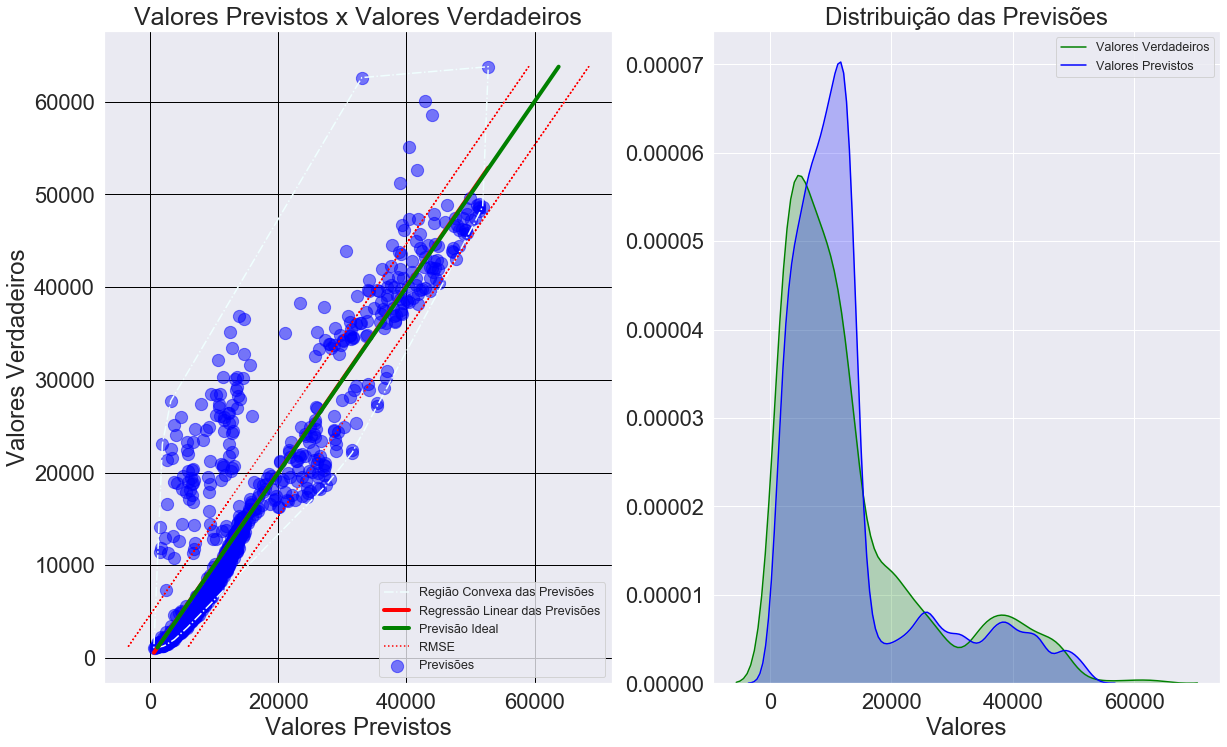

In [15]:
x0, y = previsao(r = results, g1 = dados.loc[:,dados.columns != "charges"], g2 = dados.charges, c = colunas)

modelos(LinearRegression(), X, Y, x0, y)